In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [6]:
s_data = pd.read_csv("C:\\Users\\karthick\\Downloads\\student\\student-por.csv")

In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
s_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


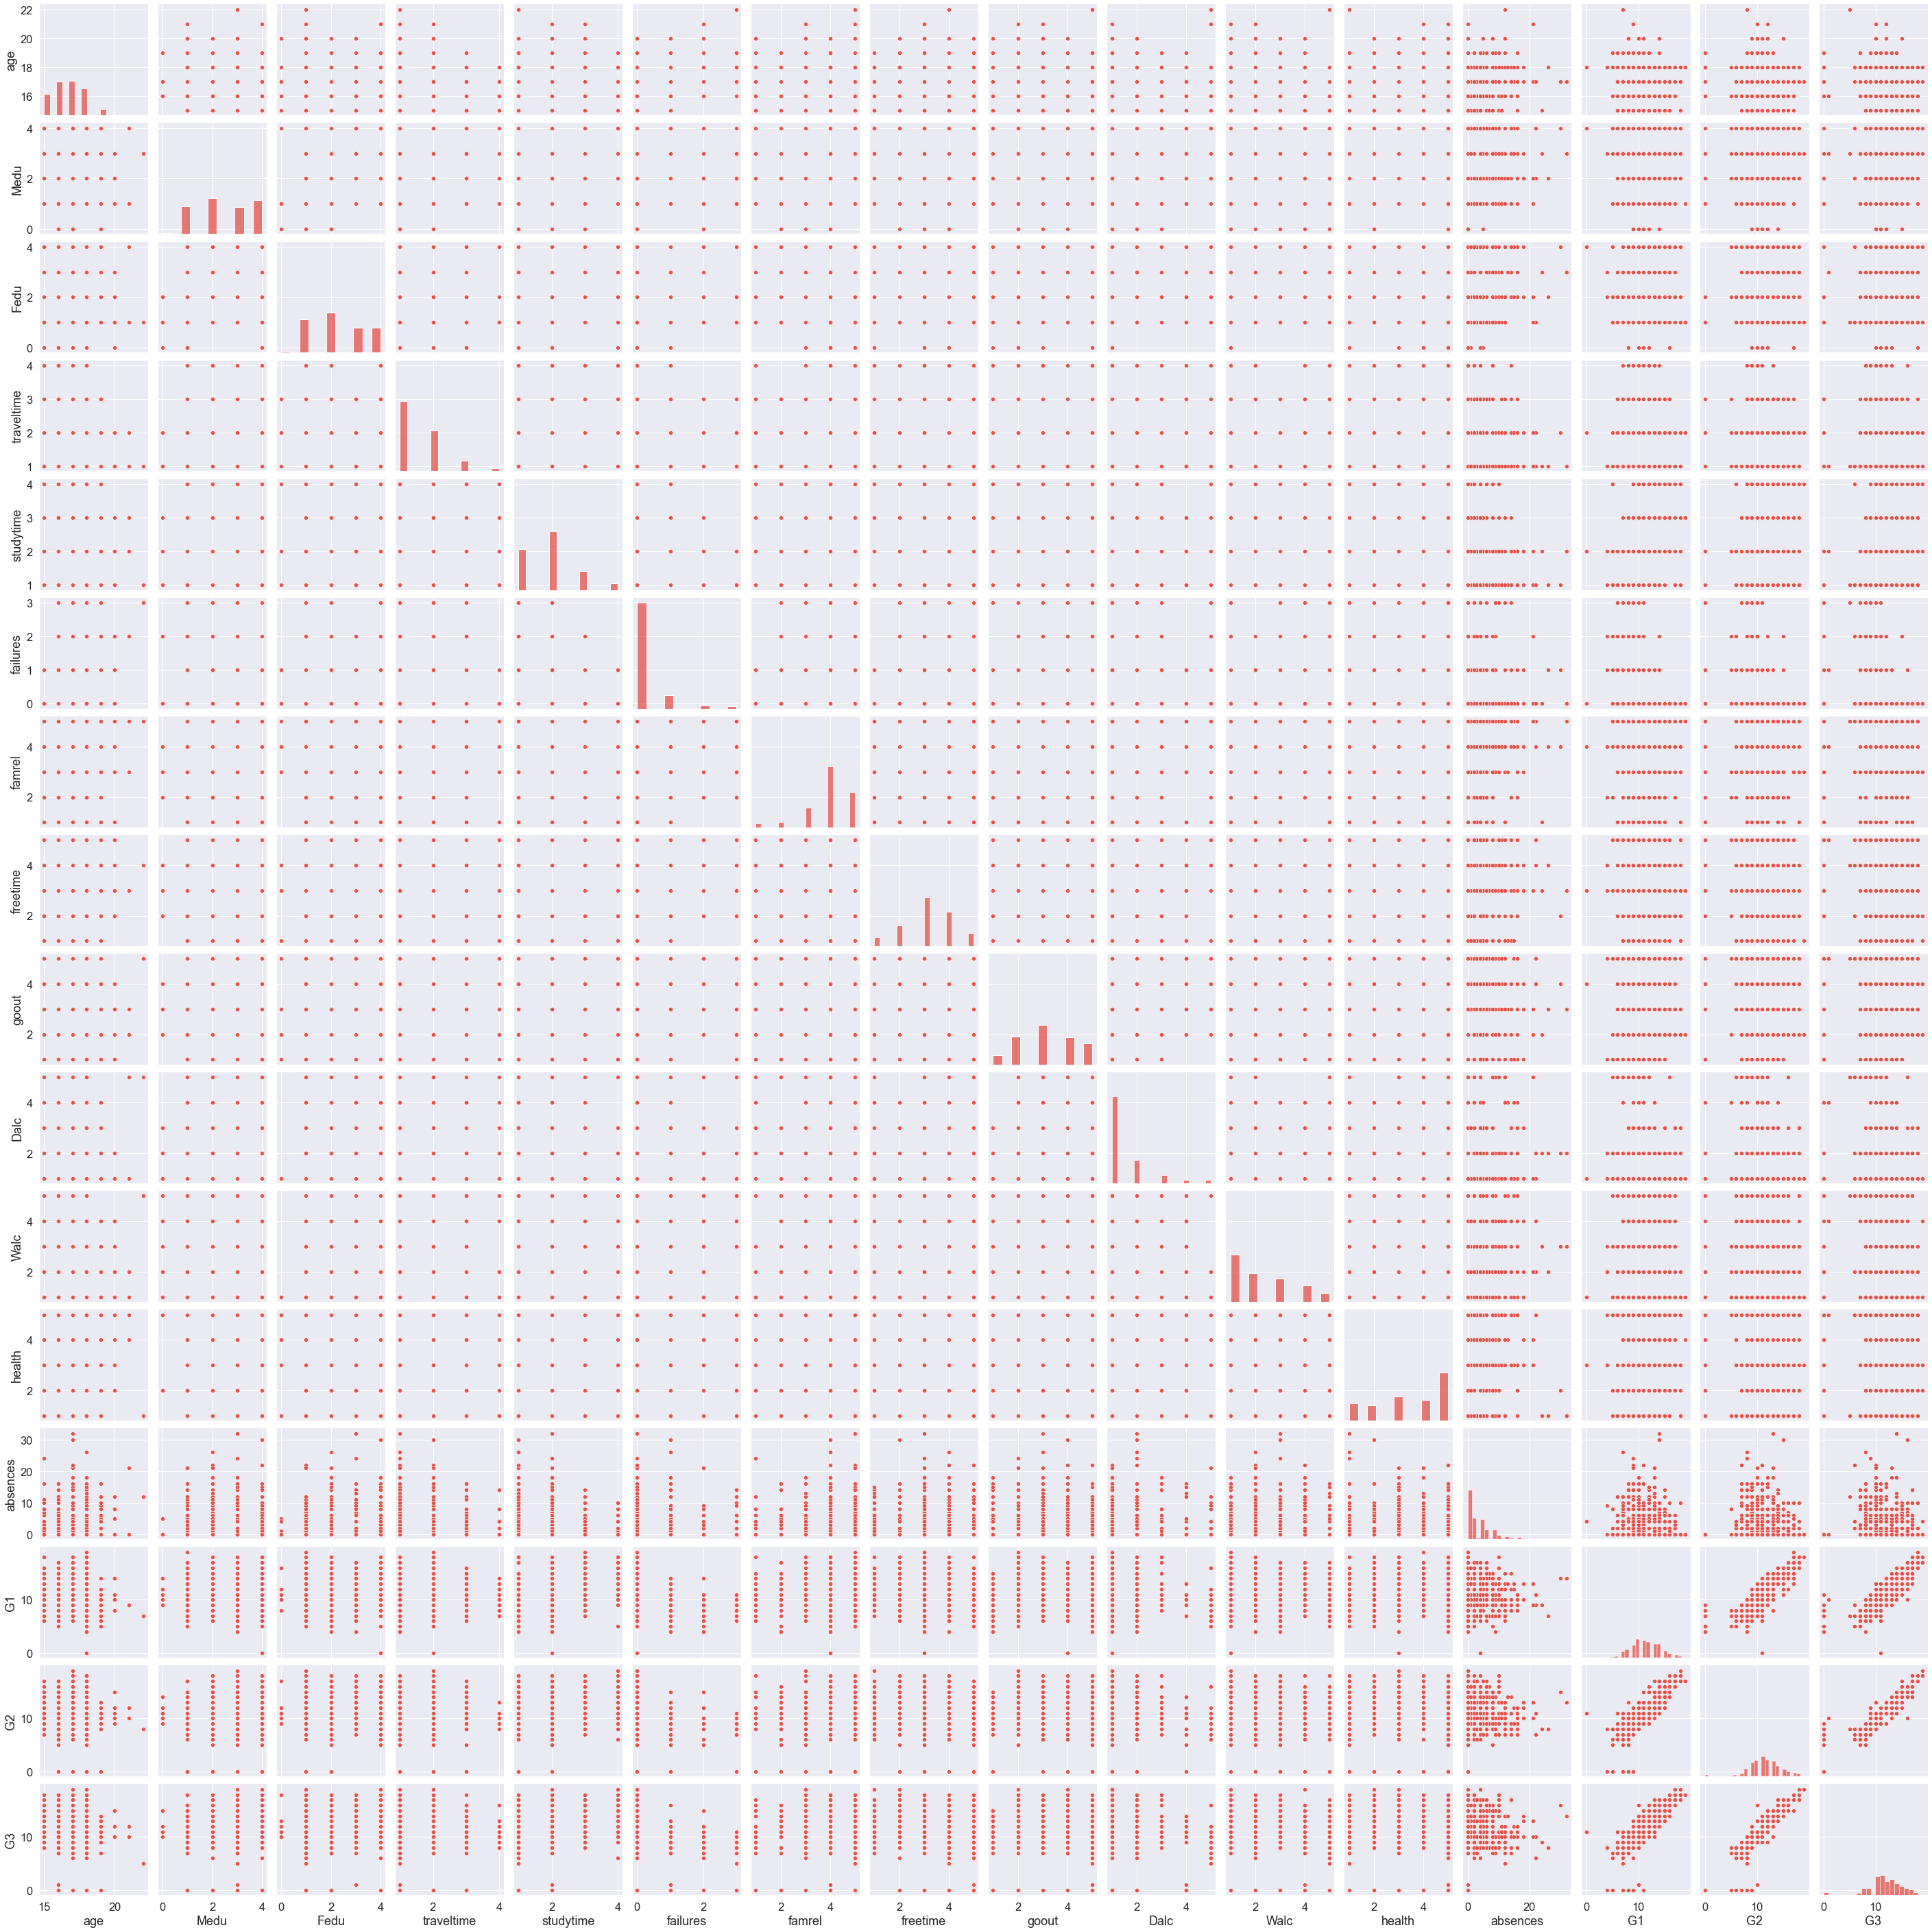

In [9]:
p = sns.pairplot(s_data)

In [52]:
# Fitting the linear model
x= s_data.iloc[:, [12,13,14,33,34,35,36,37,38,39,40,23,24,25,26,27,28,29]].values  
y= s_data.iloc[:, [30,31,32]].values

In [53]:
s_data.loc[s_data['schoolsup'] =='yes', 'schoolsup1'] = 1
s_data.loc[s_data['famsup'] =='yes', 'famsup1'] = 1
s_data.loc[s_data['paid'] =='yes','paid1'] = 1
s_data.loc[s_data['activities'] =='yes','activities1'] = 1
s_data.loc[s_data['nursery'] =='yes', 'nursery1'] = 1
s_data.loc[s_data['higher'] =='yes', 'higher1'] = 1
s_data.loc[s_data['internet'] =='yes', 'internet1'] = 1
s_data.loc[s_data['romantic'] =='yes', 'romantic1'] = 1
s_data.loc[s_data['schoolsup'] =='no', 'schoolsup1'] = 0
s_data.loc[s_data['famsup'] =='no', 'famsup1'] = 0
s_data.loc[s_data['paid'] =='no','paid1'] = 0
s_data.loc[s_data['activities'] =='no','activities1'] = 0
s_data.loc[s_data['nursery'] =='no', 'nursery1'] = 0
s_data.loc[s_data['higher'] =='no', 'higher1'] = 0
s_data.loc[s_data['internet'] =='no', 'internet1'] = 0
s_data.loc[s_data['romantic'] =='no', 'romantic1'] = 0
s_data.head()
s_data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G2,G3,schoolsup1,famsup1,paid1,activities1,nursery1,higher1,internet1,romantic1
644,MS,F,19,R,GT3,T,2,3,services,other,...,11,10,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,15,16,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,12,9,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,10,10,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
648,MS,M,18,R,LE3,T,3,2,services,other,...,11,11,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [54]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)

In [55]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test

array([[ 9,  7,  8],
       [14, 14, 15],
       [15, 16, 16],
       [10, 10, 10],
       [ 9,  9, 10],
       [13, 12, 12],
       [15, 12, 13],
       [17, 18, 17],
       [11, 12, 12],
       [12, 11, 12],
       [12, 10, 11],
       [11, 10, 10],
       [13, 13, 13],
       [ 8,  8,  8],
       [17, 18, 18],
       [12, 12, 12],
       [14, 12, 13],
       [12, 12, 13],
       [11, 10, 10],
       [10, 10, 10],
       [13, 12, 12],
       [ 9, 10, 10],
       [16, 17, 17],
       [12, 13, 15],
       [11, 12, 14],
       [ 5,  0,  0],
       [12, 12, 12],
       [12, 13, 14],
       [11, 11, 12],
       [11, 12,  9],
       [14, 13, 13],
       [17, 16, 16],
       [11, 13, 13],
       [14, 16, 16],
       [12, 12, 12],
       [ 8,  9, 10],
       [11,  9, 10],
       [11, 11, 11],
       [13, 12, 13],
       [10, 11, 10],
       [15, 15, 15],
       [16, 17, 18],
       [11, 11, 11],
       [12, 13, 13],
       [11, 12, 13],
       [11,  9, 10],
       [13, 12, 14],
       [ 9,  

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_train)

In [57]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.3128219561071684


In [58]:
print(y_pred)

[[12.12591336 12.50450302 12.85625703]
 [10.71836259 10.97984366 11.29063854]
 [10.46649518 10.71582221 11.18861575]
 ...
 [11.49855794 11.66482157 11.97521489]
 [11.94870793 12.07881019 12.43539016]
 [ 8.30286228  8.52791063  8.66656239]]


In [64]:
residuals = y_train-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.

Mean of Residuals -1.7056924383815848e-16


In [65]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

ValueError: If using all scalar values, you must pass an index